# Decision Tree Model Attempt

In [15]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [16]:
df.head()

,date,UBS_x,UBS Financial Services Inc.,UBS Investment Bank,UBS Global Wealth Management,UBS Asset Management,Open,High,Low,Close,...,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5,Stoch_Oscillator_3,Stoch_Oscillator_14
0,2019-01-04,14.791667,0.0,0.0,0.0,0.0,10.734068,10.937397,10.687472,10.878093,...,1,1,0,0,1,1,1,1,NaN,NaN
1,2019-01-07,12.208333,0.0,0.0,0.0,0.0,10.878092,11.056005,10.823024,10.988229,...,1,0,0,1,1,1,1,0,NaN,NaN
2,2019-01-08,2.333333,0.0,0.0,0.0,0.0,11.047532,11.089893,10.945868,11.013644,...,0,1,0,1,1,0,0,1,NaN,NaN
3,2019-01-09,9.083333,0.0,0.0,0.0,0.0,11.081421,11.132253,10.954340,10.979756,...,0,1,0,1,0,1,1,0,NaN,NaN
4,2019-01-10,6.416667,0.0,0.0,0.0,0.0,11.030590,11.157670,11.022117,11.098366,...,1,0,0,0,1,1,1,0,NaN,NaN


In [27]:
# Change the type of Wiki_Move and Google_ROC
df = df.iloc[14:-1, :].reset_index(drop = True)
df["Wiki_Move"] = df["Wiki_Move"].astype(int)
df["Google_ROC"] = df["Google_ROC"].astype(float)
df.head()

,date,UBS_x,UBS Financial Services Inc.,UBS Investment Bank,UBS Global Wealth Management,UBS Asset Management,Open,High,Low,Close,...,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5,Stoch_Oscillator_3,Stoch_Oscillator_14
0,2019-02-14,6.000000,0.0,0.0,0.0,0.0,10.776428,10.818789,10.708652,10.742540,...,0,0,1,1,1,1,1,1,37.868392,34.693761
1,2019-02-15,5.000000,0.0,0.0,0.0,0.0,10.911980,10.979756,10.895035,10.971284,...,1,1,0,0,0,0,1,1,43.764050,39.984756
2,2019-02-19,1.250000,0.0,0.0,0.0,0.0,10.759484,10.967049,10.742541,10.945869,...,0,0,1,0,0,0,0,1,44.217637,41.950026
3,2019-02-20,15.041667,0.0,0.0,0.0,0.0,10.581571,10.636640,10.454491,10.556155,...,1,1,1,0,0,0,0,0,42.451300,43.477662
4,2019-02-21,5.958333,0.0,0.0,0.0,0.0,10.412130,10.471434,10.395186,10.446018,...,0,0,1,1,1,1,1,0,25.586622,37.418520


Remove the columns that are used to calculate features

In [18]:
# open_prices = df["Open"]

In [19]:
'''
df.drop(columns = ["Open", "High", "Low", "Gain", "Loss", \
                   "Stock_avg_gain", "Stock_avg_loss", "Stock_rs", "Wiki_total", \  
                   "Wiki 5day disparity", \
                   "Wiki MA3 Move", "Wiki MA5 Move", "Goog Total", "Goog Gain", \
                   "Goog Loss", "Goog Avg. Gain", "Goog Avg. Loss", "Goog RS", \
                   "Goog ROC", "Goog MA3", "Goog EMA5", "Goog 3day Disparity", \
                   "Goog RSI (14 days)", "Price RSI (14 days)"], inplace = True)
'''
# Didnt find Wiki Traffic- 1 Day Lag so I just canceled it

'\ndf.drop(columns = ["Open", "High", "Low", "Gain", "Loss",                    "Stock_avg_gain", "Stock_avg_loss", "Stock_rs", "Wiki_total", \\  \n                   "Wiki 5day disparity",                    "Wiki MA3 Move", "Wiki MA5 Move", "Goog Total", "Goog Gain",                    "Goog Loss", "Goog Avg. Gain", "Goog Avg. Loss", "Goog RS",                    "Goog ROC", "Goog MA3", "Goog EMA5", "Goog 3day Disparity",                    "Goog RSI (14 days)", "Price RSI (14 days)"], inplace = True)\n'

In [20]:
# UBS_1, Basic Varaibles,  
df_1 = df[df.columns.drop(list(df.filter(regex='Move')))]
df_1 = df_1[["target_1", "Volume", 
                "Wiki_total", "Google_total", 
                "nas_close", "dow_close",
                 "Close", "nas_vol", 
                 "dow_vol", "Stock_diff",
                 'Stoch_Oscillator_3', 'Stoch_Oscillator_14']]
df_1.head()

,target_1,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol,Stock_diff,Stoch_Oscillator_3,Stoch_Oscillator_14
0,0,2884400.0,493.416667,1440.0,7164.859863,24737.199219,11.098366,2440840000,376890000,0.025417,46.249037,NaN
1,1,4429400.0,493.333333,1548.0,7085.680176,24528.220703,11.047533,2435480000,347170000,-0.050833,36.136846,44.621120
2,1,2517200.0,687.541667,1787.0,7028.290039,24579.960938,11.022117,2089690000,330870000,-0.025416,27.972038,36.785974
3,0,2176500.0,613.416667,1569.0,7183.080078,25014.859375,11.183086,2544050000,397330000,0.160970,30.303032,31.470639
4,0,2367000.0,624.000000,1667.0,7281.740234,24999.669922,10.979756,2918710000,507350000,-0.203330,26.839803,28.371624


Fix column data format

In [21]:
df["Stoch_Oscillator_14"] = df["Stoch_Oscillator_14"].astype(float)

Train/test split

In [22]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [23]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [24]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [25]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

Stoch_Oscillator_14
2.433106     1
2.861016     1
2.962862     1
4.278970     1
4.357437     1
            ..
96.692114    1
96.883017    1
96.936771    1
96.939696    1
97.270853    1
Name: Stoch_Oscillator_14, Length: 634, dtype: int64


Feature scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns = X.columns)

/Users/fabrizio/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

Each feature's correlation with every other feature

In [11]:
corr_matrix = X_train_sc.corr()

Each feature's correlation with the target variable

In [12]:
feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

Select features based on correlation

In [13]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki 5day Disparity Move
Removed from list of features: Wiki 3day Disparity
Removed from list of features: Wiki EMA5 Move
Removed from list of features: Google_Move
Removed from list of features: Goog MA5
Removed from list of features: Goog 3day Disparity Move


In [14]:
X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [15]:
corr_matrix_selected_features = X_train_tr.corr()

Plot number of components vs. explained variance for PCA algorithm

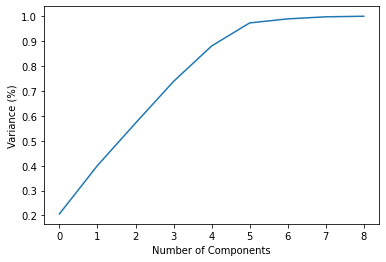

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [17]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

Model =======================================================================================

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

Make predictions

In [19]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [20]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.416667  0.545455  0.472441   55.000000
be long        0.705882  0.588235  0.641711  102.000000
accuracy       0.573248  0.573248  0.573248    0.573248
macro avg      0.561275  0.566845  0.557076  157.000000
weighted avg   0.604565  0.573248  0.582413  157.000000



Tree diagram

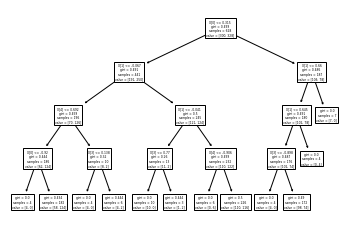

In [21]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
plot_tree(model, ax = plt.axes())
plt.show()

Evaluate model

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Print metrics

In [23]:
metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [24]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      60.987261  57.324841
Precision     59.857482  58.823529
Recall        76.829268  70.588235
F1 Score      67.289720  64.171123
